In [3]:
#Classification using Deep neural network.
#1. Multiclass classification using Deep Neural Networks: Example: Use the OCR letter
#recognition dataset https://archive.ics.uci.edu/ml/datasets/letter+recognition
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix
import math
import time
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

In [4]:
#loading the dataset
data = pd.read_csv("letter-recognition.csv",header=0)# header 0 means the first row is name of the coloumn 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [5]:
data.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [6]:
data.head(40)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


<Axes: xlabel='count', ylabel='letter'>

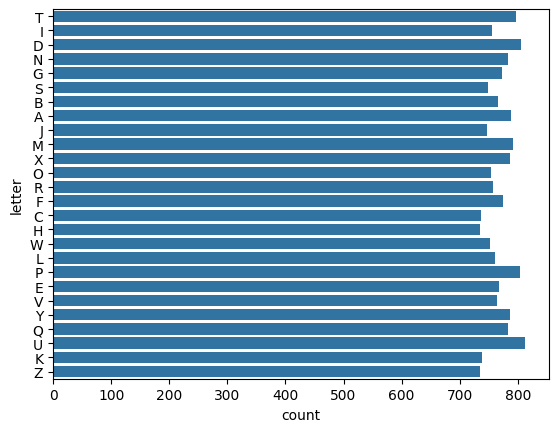

In [7]:
#ploting the distrubition
sns.countplot(data['letter'])

In [8]:
#splitting and training
data_path = 'letter-recognition.data'
columns = ['letter'] + [f'feature_{i}' for i in range(16)]
df = pd.read_csv(data_path, names=columns)

label_encoder = LabelEncoder()
df['target'] = label_encoder.fit_transform(df['letter'])
X = df.drop(['letter', 'target'], axis=1)
y = df['target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
class_mapping = {
    0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J',
    10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T',
    20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'
}


In [10]:
#fitting the model
# Build the deep neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(16,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(26, activation='softmax'))  # 26 classes for letters

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
start_time = time.time()  # Starting the timer
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))
end_time = time.time()  # Ending the timer
# Calculating and printing the time taken for training
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

C:\Users\sngon\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3624 - loss: 2.3447 - val_accuracy: 0.7178 - val_loss: 1.0309
Epoch 2/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7303 - loss: 0.9584 - val_accuracy: 0.7837 - val_loss: 0.7726
Epoch 3/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7725 - loss: 0.7750 - val_accuracy: 0.8037 - val_loss: 0.6708
Epoch 4/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8100 - loss: 0.6360 - val_accuracy: 0.8335 - val_loss: 0.5613
Epoch 5/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8385 - loss: 0.5402 - val_accuracy: 0.8472 - val_loss: 0.5064
Epoch 6/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8550 - loss: 0.4844 - val_accuracy: 0.8633 - val_loss: 0.4623
Epoch 7/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8628 - loss: 0.4564 - val_accuracy: 0.8673 - val_loss: 0.4244
Epoch 8/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8766 - loss: 0.3977 - val_accuracy: 0.

In [11]:
#1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
user_input = input("Enter values for the 17 features separated by commas: ")
user_input_list = [int(x) for x in user_input.split(',')]

#Convert the user input to a NumPy array
new_data = np.array(user_input_list).reshape(1, -1)

#Use the model to make predictions
start_time = time.time()  # Starting the timer for predictio
predictions = model.predict(new_data)
end_time = time.time()  # Ending the timer for prediction
# Calculating and printing the time taken for prediction
prediction_time = end_time - start_time


print(f"Prediction time: {prediction_time} seconds")

#Display the predictions
predicted_class = np.argmax(predictions)
print(f'\nThe predicted class is: {predicted_class} Means the letter is  {class_mapping[predicted_class]}')

Enter values for the 17 features separated by commas:  4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
Prediction time: 0.2918403148651123 seconds

The predicted class is: 18 Means the letter is  S
